In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
include("HyperECNNs.jl")
rng = MersenneTwister(0);

In [2]:
if ~isdir("Figures")
    mkdir("Figures")
    print("Created a folder for the figures.")
end

In [3]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

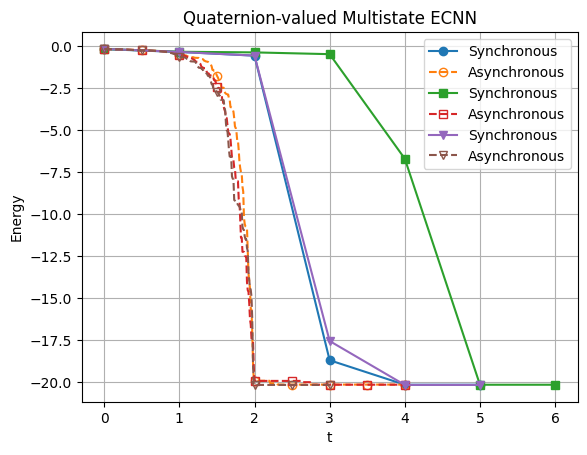

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
N = 100
P = 160
K = 16
alpha = 10/(2*N)
beta = -10

MultiStates = exp.(2*pi*collect(0:K-1)*im/K)
U=zeros(N,4,P)
for i=1:3
    Uz1 = rand(rng,MultiStates,(N,P))
    Uz2 = rand(rng,MultiStates,(N,P))
    U[:,1,:] = real.(Uz1)
    U[:,2,:] = imag.(Uz1)
    U[:,3,:] = real.(Uz2)
    U[:,4,:] = imag.(Uz2)
    
    xz1 = rand(rng,MultiStates,(N,1))
    xz2 = rand(rng,MultiStates,(N,1))
    x = hcat(real.(xz1),imag.(xz1),real.(xz2),imag.(xz2))

    y, Energy_Sync = HyperECNNs.Sync(HyperECNNs.LambdaInner,[1,1,1,1],HyperECNNs.twincsign,K,U,x,alpha,beta)
    y, Energy_Seq = HyperECNNs.Seq(HyperECNNs.LambdaInner,[1,1,1,1],HyperECNNs.twincsign,K,U,x,alpha,beta)
    
    plot(collect(0:length(Energy_Sync)-1),Energy_Sync, linestyle = LineStyleList[1], marker = MarkerList[i], label = "Synchronous")
    plot(collect(0:length(Energy_Seq)-1)/N,Energy_Seq, linestyle = LineStyleList[2], marker = MarkerList[i], markevery=50,  mfc="none", label = "Asynchronous")
end
xlabel("t")
ylabel("Energy")
title("Quaternion-valued Multistate ECNN")
legend()
grid()
savefig("Figures/EnergyQvMultistate.eps")
savefig("Figures/EnergyQvMultistate.pdf")